In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from skmultilearn.adapt import MLkNN
import sklearn.metrics as metrics
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
import os

2024-05-10 18:26:07.615861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 18:26:07.615891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 18:26:07.616778: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-10 18:26:07.622413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 18:26:08.276645: W tensorflow/comp

In [3]:
d2= pd.read_csv('/home/yadagiri/train_dataset.csv')

In [4]:
d2

,id,Category,text,Vocabulary,Noun Count,Verb Count,AUX Count,NUM Count,PRON Count,ADV Count,INTJ Count,PART Count,label
0,text-bison-002/news-2021-01-01-2021-12-31-capi...,text-bison,Unveiling the Plot: Evidence Points to Premedi...,279,146,86,2,2,9,13,0,0,1
1,gpt-3.5-turbo-0125/news-2021-01-01-2021-12-31-...,gpt-3.5-turbo,Chris Wallace Departs Fox News After 18 Years ...,215,85,48,1,5,12,5,0,1,1
2,mistralai-mixtral-8x7b-instruct-v0.1/news-2021...,mistralai-mixtral-8x7b,Tiger Woods' Resurgence: A Journey from Scanda...,255,107,64,4,10,31,13,0,0,1
3,text-bison-002/news-2021-01-01-2021-12-31-bide...,text-bison,Fact Check: Biden Inauguration Amidst Pandemic...,282,130,84,0,6,7,9,0,1,1
4,bigscience-bloomz-7b1/news-2021-01-01-2021-12-...,bigscience-bloomz,"Hurricane Ida, the third major hurricane to hi...",114,66,58,2,11,4,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,mistralai-mixtral-8x7b-instruct-v0.1/news-2021...,mistralai-mixtral-8x7b,"Tom Brady Retires, Baker Mayfield Takes Over: ...",261,121,64,10,25,9,10,0,1,1
12146,bigscience-bloomz-7b1/news-2021-01-01-2021-12-...,bigscience-bloomz,"NEW YORK (CNN) -- On the morning of Sept. 11, ...",125,37,36,0,4,17,7,0,1,1
12147,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,Tiger Woods was involved in a serious car cras...,147,103,86,1,1,32,16,0,1,1
12148,articles-cleaned-truncated/news-2021-01-01-202...,Human,Facebook warns of slower revenue growth amid f...,233,106,54,1,17,10,10,0,2,0


In [5]:
print(d2.shape)

(12150, 13)


In [6]:
print(d2.isnull().sum())

id            0
Category      0
text          0
Vocabulary    0
Noun Count    0
Verb Count    0
AUX Count     0
NUM Count     0
PRON Count    0
ADV Count     0
INTJ Count    0
PART Count    0
label         0
dtype: int64


In [7]:
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [8]:
X = list(d2['text'])
#y = np.asarray(d1[d1.columns[1:]])
y_data = d2[d2.columns[12:13]]
y = y_data.values

In [9]:
#Model CNN & Bi-LSTM
import keras
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM
# from keras.layers.recurrent import LSTM
# from keras.layers.core import Activation, Dropout, Dense
from keras.layers import LSTM, Activation, Dropout, Dense, Flatten, Bidirectional, GRU, concatenate, SpatialDropout1D

from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from keras.optimizers import Adam,SGD,RMSprop
from keras.losses import MeanSquaredError
######## Textual Features for Embedding ###################
max_len = 100
# max_features = 10000
max_features = 4479
embed_size = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post', maxlen=max_len)

In [10]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [11]:
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

/home/yadagiri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 1, 0, 1])

In [12]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=2)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [13]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/home/yadagiri/glove.6B.300d.txt', encoding="utf8") ## using pre-trained or self-trained embeddings ##

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)

embedding_matrix = zeros((num_words, embed_size)) ## has to be similar to glove dimension ##
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Load your data, assuming you have a DataFrame 'df' with 'text' and 'label' columns
# Ensure that the 'label' column contains 'neither,' 'racist,' or 'sexist'

# Split your data into features (X) and labels (y)
# X = d2['text'].values
# y = d2['label'].values

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store classification reports for each fold
classification_reports = []
# Initialize lists to store metrics for each fold
precision_list = []
recall_list = []
f1_score_list = []

# # Define the maximum number of words to consider in the text
# max_words = 10000

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
# tokenizer.fit_on_texts(X)

# # Convert text data to sequences
# X_sequences = tokenizer.texts_to_sequences(X)

# # Define the maximum sequence length (adjust as needed)
# max_sequence_length = 100

# Convert labels to categorical (one-hot encoding)
# y_encoded = to_categorical(y, num_classes=3)

# Iterate through the folds
# import pdb;pdb.set_trace()
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Define the model architecture
    sequence_input = Input(shape=(max_len, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)
    x = SpatialDropout1D(0.2)(x) ## ostly drops the entire 1D feature map rather than individual elements.
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    # x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    #x = Conv1D(16, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model = Model(sequence_input, preds)
    # model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['acc'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     model = Sequential()
#     model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
#     model.add(SpatialDropout1D(0.2))
#     model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1)))
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(3, activation="softmax"))

#     # Compile the model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    epochs = 3
    batch_size = 128
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model on the validation data
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

#     # Generate and store the classification report for this fold
#     report = classification_report(y_val_labels, y_pred_labels, target_names=['neither', 'racist', 'sexist'])
#     classification_reports.append(report)

#     print(f'Fold {fold + 1} - Classification Report:\n{report}\n')

# # Print the average classification report across all folds
# average_report = '\n'.join(classification_reports)
# print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')
     # Generate the classification report for this fold
    report = classification_report(y_val_labels, y_pred_labels, target_names=['Human', 'AI'], output_dict=True)

    # Extract precision, recall, and f1-score
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Human", "AI"])}\n')

# Calculate the average precision, recall, and f1-score across all folds
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

# Display the average classification report
average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

2024-05-10 18:26:35.860066: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-10 18:26:35.860151: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: nits-lab
2024-05-10 18:26:35.860173: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: nits-lab
2024-05-10 18:26:35.860491: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.171.4
2024-05-10 18:26:35.860551: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.171.4
2024-05-10 18:26:35.860567: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.171.4


Epoch 1/3
76/76 [==============================] - 15s 142ms/step - loss: 0.2323 - accuracy: 0.9274 - val_loss: 0.1982 - val_accuracy: 0.9222
Epoch 2/3
76/76 [==============================] - 10s 138ms/step - loss: 0.1746 - accuracy: 0.9295 - val_loss: 0.1665 - val_accuracy: 0.9259
Epoch 3/3
76/76 [==============================] - 2s 18ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

       Human       0.69      0.06      0.11       189
          AI       0.93      1.00      0.96      2241

    accuracy                           0.92      2430
   macro avg       0.81      0.53      0.53      2430
weighted avg       0.91      0.92      0.89      2430


Epoch 1/3
76/76 [==============================] - 14s 142ms/step - loss: 0.2474 - accuracy: 0.9210 - val_loss: 0.1766 - val_accuracy: 0.9313
Epoch 2/3
76/76 [==============================] - 11s 139ms/step - loss: 0.1751 - accuracy: 0.9294 - val_loss: 0.1549 - val_accuracy: 0.9309
Epoch 3/

save the model

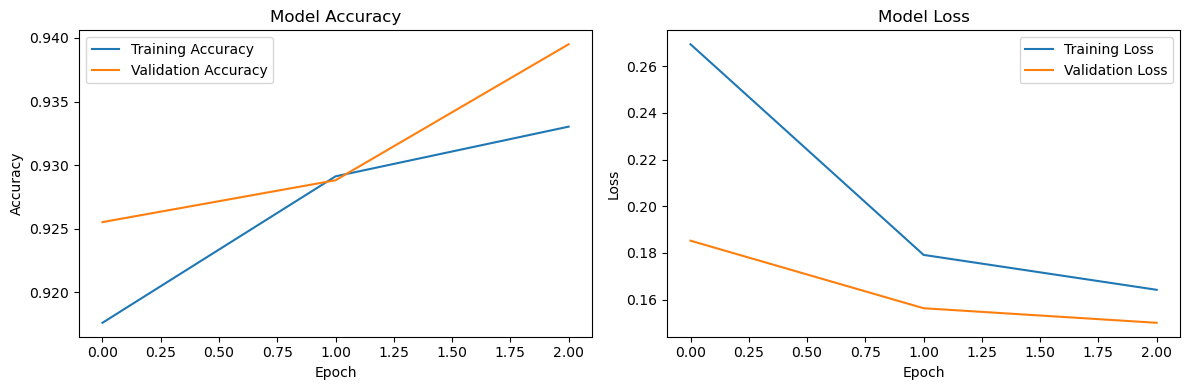

In [15]:
# Assuming you have trained your model and have a `history` object
# after fitting the model

import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Assuming you have `y_val_labels` and `y_pred_labels` as the true and predicted labels

# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels, y_pred_labels, average='weighted')
precision = precision_score(y_val_labels, y_pred_labels, average='weighted')
recall = recall_score(y_val_labels, y_pred_labels, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)

F1 Score: 0.9340469127360372
Precision: 0.931904718459601
Recall: 0.9395061728395062
{'Human': {'precision': 0.6422764227642277, 'recall': 0.4340659340659341, 'f1-score': 0.5180327868852459, 'support': 182.0}, 'AI': {'precision': 0.9553532726484613, 'recall': 0.9804270462633452, 'f1-score': 0.9677277716794731, 'support': 2248.0}, 'accuracy': 0.9395061728395062, 'macro avg': {'precision': 0.7988148477063445, 'recall': 0.7072464901646396, 'f1-score': 0.7428802792823594, 'support': 2430.0}, 'weighted avg': {'precision': 0.931904718459601, 'recall': 0.9395061728395062, 'f1-score': 0.9340469127360372, 'support': 2430.0}}


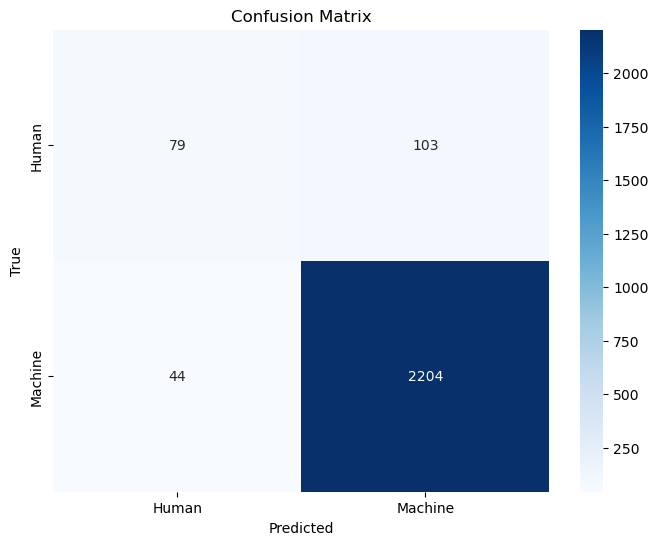

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true = true_labels
# y_pred = predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human','Machine'],
            yticklabels=['Human','Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
df= pd.read_csv('/home/yadagiri/test_dataset.csv')

In [19]:
df

,id,Category,text,Vocabulary,Noun Count,Verb Count,AUX Count,NUM Count,PRON Count,ADV Count,INTJ Count,PART Count,label
0,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,George Floyd's Unprecedented Unprecedented Cri...,113,125,53,2,11,0,6,0,0,1
1,qwen-qwen1.5-72b-chat-8bit/news-2021-01-01-202...,qwen-qwen1.5,"CNN – January 6, 2021, will forever be etched ...",273,90,73,2,3,17,22,0,0,1
2,mistralai-mistral-7b-instruct-v0.2/news-2021-0...,mistralai-mistral-7b,Beto O'Rourke Leads Winter Storm Relief Effort...,280,116,91,8,2,27,16,0,3,1
3,gpt-3.5-turbo-0125/news-2021-01-01-2021-12-31-...,gpt-3.5-turbo,Tiger Woods Opens Up About Near-Loss of Leg an...,230,101,62,3,1,31,9,0,2,1
4,qwen-qwen1.5-72b-chat-8bit/news-2021-01-01-202...,qwen-qwen1.5,Radio Host Dave Ramsey Slams Another Round of ...,221,74,56,0,12,15,14,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,chavinlo-alpaca-13b/news-2021-01-01-2021-12-31...,chavinlo-alpaca,Prince Harry and Meghan Markle Miss This Year'...,105,43,24,0,3,9,11,0,1,1
3034,text-bison-002/news-2021-01-01-2021-12-31-capi...,text-bison,"Nikki Haley Breaks Ranks with Trump, Foresees ...",295,101,104,6,5,67,20,0,1,1
3035,vicgalle-gpt2-open-instruct-v1/news-2021-01-01...,vicgalle-gpt2,Global COVID-19 Deaths Unveiled Amidst Growing...,187,83,49,4,16,9,7,0,0,1
3036,bigscience-bloomz-7b1/news-2021-01-01-2021-12-...,bigscience-bloomz,"Colonial Pipeline, U.S.'s largest fuel pipelin...",105,56,47,3,0,5,6,0,0,1


In [20]:
######## Textual Features for Embedding ###################

sequence = tokenizer.texts_to_sequences(df.text)
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)

In [21]:
sequence = tokenizer.texts_to_sequences(df['text']) # same tokenizer which is used on train data.
sequence = pad_sequences(sequence,padding='post', maxlen = max_len)

predictions = model.predict(sequence)
classes=np.argmax(predictions,axis=1)

95/95 [==============================] - 2s 19ms/step


In [22]:
predictions

array([[1.2098800e-04, 9.9987894e-01],
       [1.3419354e-01, 8.6580646e-01],
       [2.4522953e-03, 9.9754769e-01],
       ...,
       [2.1496369e-02, 9.7850364e-01],
       [1.0006313e-02, 9.8999375e-01],
       [6.1082538e-02, 9.3891746e-01]], dtype=float32)

In [23]:
df= pd.read_csv('/home/yadagiri/test_dataset.csv')
y_data = df[df.columns[12:13]]
y = y_data.values
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from keras.utils import to_categorical
y_test_one_hot = to_categorical(y_encoded, num_classes=2)
y_test_one_hot

/home/yadagiri/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [24]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to discrete class labels
y_true = np.argmax(y_test_one_hot, axis=1)  # Assuming y_test_one_hot is a NumPy array

# Convert continuous predictions to discrete class labels
y_pred_discrete = np.argmax(predictions, axis=1)  # Assuming y_pred is a NumPy array

# Generate the classification report
report = classification_report(y_true, y_pred_discrete)

# Print the classification report
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.9340469127360372
Precision: 0.931904718459601
Recall: 0.9395061728395062
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       217
           1       0.95      0.98      0.96      2821

    accuracy                           0.93      3038
   macro avg       0.73      0.65      0.68      3038
weighted avg       0.92      0.93      0.92      3038



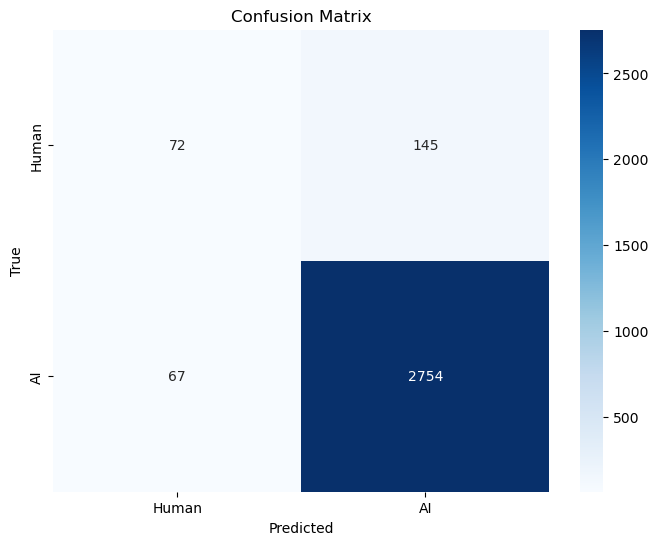

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true = true_labels
# y_pred = predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_discrete)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human','AI'],
            yticklabels=['Human','AI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()